In [1]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
import numpy as np
from matplotlib.pyplot import imshow
X_train = train.drop(['label'], axis=1)
Y_train = train['label']
X_train = X_train/255
test = test/255
imshow(np.reshape(X_train.iloc[:1].to_numpy(), (28,28))) #show the image of first row, reshape a row to a 28x28 matrix
#feature = ['pixel{}'.format(pixel_num) for pixel_num in range(784)] #list(train.columns)[1:] is same as feature

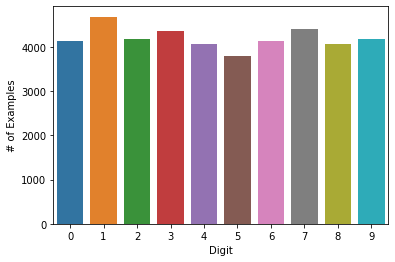

In [3]:
import seaborn as sns
counts = pd.DataFrame(Y_train.value_counts()) #changed from series to dataframe, easier to manipulate
counts['Digit'] = counts.index
counts.rename(columns = {'label': '# of Examples'}, inplace = True)
sns.barplot(x = "Digit", y = "# of Examples", data = counts)

In [9]:
import gc
from sklearn.pipeline import make_pipeline #Construct a Pipeline from the given estimators.
from sklearn.preprocessing import StandardScaler #Standardize features by removing the mean and scaling to unit variance
from sklearn.model_selection import cross_val_score #Evaluate a score by cross-validation
from sklearn.svm import SVC #C-Support Vector Classification
import matplotlib.pyplot as plt
import time
%matplotlib inline 
#make your plot outputs appear and be stored within the notebook

In [36]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid'] #Radial-basis function kernel (aka squared-exponential kernel)
total_time = []
scores = []

for kernel in kernels:
    print('Building model for {} kernel'.format(kernel))
    t0 = time.time()
    models = make_pipeline(StandardScaler(), SVC(kernel=kernel, random_state=1995)) #work as seed, Using an int will produce the same results across different calls
    model_scores = cross_val_score(models, X_train, Y_train, cv=3, n_jobs=-1, scoring='accuracy')  #一会试试cv=5 #n_jobs: Number of jobs to run in parallel. -1 means using all processors.
    t1 = time.time()
    print('Processing time is {}'.format(t1-t0))
    print('Accuracy score is {}'.format(model_scores))
    total_time.append(t1-t0)
    scores.append(model_scores.mean())
    del models
    gc.collect #del model and gc.collect() to keep our memory usage down

Building model for linear kernel
Processing time is 167.54169344902039
Accuracy score is [0.91316767 0.91677382 0.9169167 ]
Building model for poly kernel
Processing time is 644.018871307373
Accuracy score is [0.93651814 0.93420489 0.93463352]
Building model for rbf kernel
Processing time is 295.82449221611023
Accuracy score is [0.95437018 0.95585084 0.95820832]
Building model for sigmoid kernel
Processing time is 228.11506915092468
Accuracy score is [0.90588403 0.90141449 0.90634376]


<function matplotlib.pyplot.show(*args, **kw)>

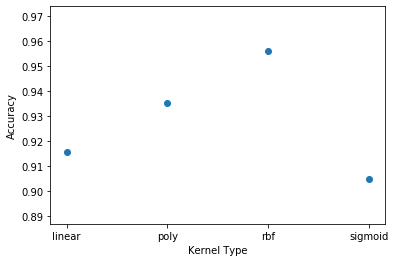

In [37]:
plt.scatter(kernels, scores)
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

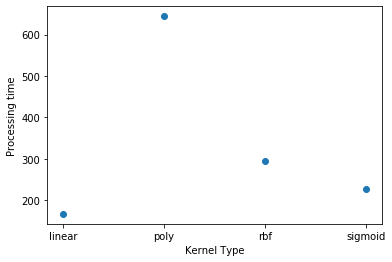

In [38]:
plt.scatter(kernels, total_time)
plt.xlabel('Kernel Type')
plt.ylabel('Processing time')
plt.show

In [6]:
clf = SVC(kernel='rbf', gamma='auto', random_state=1995)
clf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=1995, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
prediction=clf.predict(test)
#pd.DataFrame({'ImageID': index+1 for index,'Label':prediction)

In [8]:
df = pd.DataFrame(enumerate(prediction))
new_column = pd.DataFrame({0: df[0]+1})
df.update(new_column)
df.rename(columns = {0: 'ImageID', 1: 'Label'}, inplace = True)
df.to_csv('submission.csv', index=False)

In [7]:
from sklearn.tree import DecisionTreeClassifier
models = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1995)) #work as seed, Using an int will produce the same results across different calls
model_scores = cross_val_score(models, X_train, Y_train, cv=3, n_jobs=-1, scoring='accuracy')  #一会试试cv=5 #n_jobs: Number of jobs to run in parallel. -1 means using all processors.
print('Accuracy score is {}'.format(model_scores))

Accuracy score is [0.84818623 0.84590656 0.84654951]


In [8]:
from sklearn.linear_model import LogisticRegression
models = make_pipeline(StandardScaler(), LogisticRegression(random_state=1995)) #work as seed, Using an int will produce the same results across different calls
model_scores = cross_val_score(models, X_train, Y_train, cv=3, n_jobs=-1, scoring='accuracy')  #一会试试cv=5 #n_jobs: Number of jobs to run in parallel. -1 means using all processors.
print('Accuracy score is {}'.format(model_scores))

Accuracy score is [0.90609826 0.90627232 0.90541506]


In [7]:
from sklearn.neural_network import MLPClassifier
models = make_pipeline(StandardScaler(), MLPClassifier(random_state=1995)) #work as seed, Using an int will produce the same results across different calls
model_scores = cross_val_score(models, X_train, Y_train, cv=3, n_jobs=-1, scoring='accuracy')  #一会试试cv=5 #n_jobs: Number of jobs to run in parallel. -1 means using all processors.
print('Accuracy score is {}'.format(model_scores))

Accuracy score is [0.96386747 0.96356622 0.96770967]


Building model for DescisionTree
Processing time is 9.499960660934448
Accuracy score is [0.84818623 0.84590656 0.84654951]
Building model for LogisticRegression
Processing time is 368.3778853416443
Accuracy score is [0.90609826 0.90627232 0.90541506]
Building model for MLPClassifier
Processing time is 42.22975206375122
Accuracy score is [0.96386747 0.96356622 0.96770967]


<function matplotlib.pyplot.show(*args, **kw)>

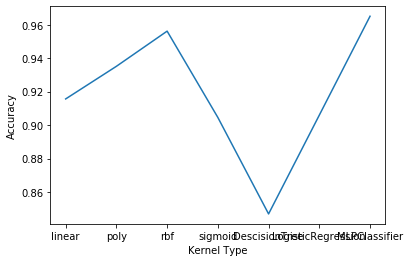

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
classifiers = {'DescisionTree': DecisionTreeClassifier(random_state=1995), 'LogisticRegression': LogisticRegression(random_state=1995), 'MLPClassifier': MLPClassifier(random_state=1995)}
for key, value in classifiers.items():
    print('Building model for {}'.format(key))
    t0 = time.time()
    models = make_pipeline(StandardScaler(),value) #work as seed, Using an int will produce the same results across different calls
    model_scores = cross_val_score(models, X_train, Y_train, cv=3, n_jobs=-1, scoring='accuracy')  #一会试试cv=5 #n_jobs: Number of jobs to run in parallel. -1 means using all processors.
    t1 = time.time()
    print('Processing time is {}'.format(t1-t0))
    print('Accuracy score is {}'.format(model_scores))
    total_time.append(t1-t0)
    scores.append(model_scores.mean())
    del models
    gc.collect #del model and gc.collect() to keep our memory usage down


<function matplotlib.pyplot.show(*args, **kw)>

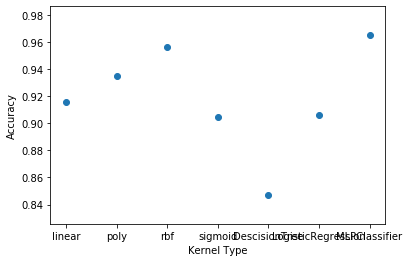

In [33]:
plt.scatter(kernels+list(classifiers.keys()), scores)
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

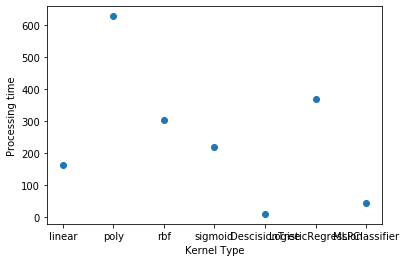

In [31]:
plt.scatter(kernels+list(classifiers.keys()), total_time)
plt.xlabel('Kernel Type')
plt.ylabel('Processing time')
plt.show

In [13]:
clf2 = MLPClassifier(random_state=1995).fit(X_train, Y_train)
prediction2=clf2.predict(test)
df2 = pd.DataFrame(enumerate(prediction2))
new_column2 = pd.DataFrame({0: df2[0]+1})
df2.update(new_column2)
df2.rename(columns = {0: 'ImageID', 1: 'Label'}, inplace = True)
df2.to_csv('submission2.csv', index=False)

## Summary
### Used Support Vector Machine (SVM) classifier called SVC. To figure out which kernel parameter works best, I iterated through all the options ('linear', 'poly', 'rbf', 'sigmoid'), split the test data into a test dataset and a validation dataset, and test to see which model is best. For each model, we do this building 3 times so that we can do what is called a cross-validation. It turns out that 'rbf' is the best for this dataset as its average accuracy score is 0.956 which is the highest. So I built 'rbf' by using the entire dataset.
### After that I also tried other classifiers. I tried DecisionTreeClassifier, LogisticRegression and MLPClassifier(Multi-layer Perceptron classifier) and calculated their accurary score. The result shows that MLPClassifier is 0.965 which is even better than SVC 'rbf' and all others are worser, so I used this classifier to do the prediction again.

In [34]:
scores

[0.9156193978664028,
 0.9351188477204827,
 0.9561431104186386,
 0.9045474281040434,
 0.846880765885721,
 0.9059285471842204,
 0.9650477876649372]

In [35]:
total_time

[161.87743997573853,
 626.6503608226776,
 302.03987193107605,
 219.18536949157715,
 9.499960660934448,
 368.3778853416443,
 42.22975206375122]